In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
install.packages("dplyr") 
install.packages("stats")
install.packages("caret") 
install.packages("randomForest",dependencies=TRUE)
install.packages("groupdata2")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 852103 bytes (832 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [4]:
%%R
library(stats)
library(dplyr)
library(randomForest)
library(groupdata2)
library(caret)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: randomForest 4.6-14

R[write to console]: Type rfNews() to see new features/changes/bug fixes.

R[write to console]: 
Attaching package: ‘randomForest’


R[write to console]: The following object is masked from ‘package:dplyr’:

    combine


R[write to console]: Loading required package: ggplot2

R[write to console]: 
Attaching package: ‘ggplot2’


R[write to console]: The following object is masked from ‘package:randomForest’:

    margin


R[write to console]: Loading required package: lattice



In [5]:
%%R
data = read.csv('/content/gdrive/My Drive/DS_CP/diabetes.csv')
str(data)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [6]:
%%R
data=upsample(
  data,
  cat_col= "Outcome",
  id_col = NULL,
  id_method = "n_ids",
  mark_new_rows = FALSE
)

In [7]:
%%R
data$Outcome <- as.factor(data$Outcome)
table(data$Outcome)


  0   1 
500 500 


In [8]:
%%R
set.seed(222)
ind <- sample(2, nrow(data), replace = TRUE,prob = c(0.8,0.2))
train <- data[ind==1,]
test <- data[ind==2,]


In [9]:
%%R
set.seed(123)
rf <- randomForest(Outcome~., data = train,
                   ntree = 550, 
                   mtry = 2,
                   importance = TRUE,
                   proximity = TRUE)
print(rf)
attributes(rf)


Call:
 randomForest(formula = Outcome ~ ., data = train, ntree = 550,      mtry = 2, importance = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 550
No. of variables tried at each split: 2

        OOB estimate of  error rate: 15.67%
Confusion matrix:
    0   1 class.error
0 328  85   0.2058111
1  43 361   0.1064356
$names
 [1] "call"            "type"            "predicted"       "err.rate"       
 [5] "confusion"       "votes"           "oob.times"       "classes"        
 [9] "importance"      "importanceSD"    "localImportance" "proximity"      
[13] "ntree"           "mtry"            "forest"          "y"              
[17] "test"            "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"        



In [11]:
%%R
p1 <- predict(rf,train)
confusionMatrix(p1, train$Outcome)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 413   0
         1   0 404
                                     
               Accuracy : 1          
                 95% CI : (0.9955, 1)
    No Information Rate : 0.5055     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5055     
         Detection Rate : 0.5055     
   Detection Prevalence : 0.5055     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     


In [10]:
%%R
p2 <- predict(rf,test)
confusionMatrix(p2,test$Outcome)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 72  4
         1 15 92
                                          
               Accuracy : 0.8962          
                 95% CI : (0.8426, 0.9363)
    No Information Rate : 0.5246          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7906          
                                          
 Mcnemar's Test P-Value : 0.02178         
                                          
            Sensitivity : 0.8276          
            Specificity : 0.9583          
         Pos Pred Value : 0.9474          
         Neg Pred Value : 0.8598          
             Prevalence : 0.4754          
         Detection Rate : 0.3934          
   Detection Prevalence : 0.4153          
      Balanced Accuracy : 0.8930          
                                          
       'Positive' Class : 0               
                                    

mtry = 2  OOB error = 15.06% 
Searching left ...
mtry = 1 	OOB error = 15.91% 
-0.05691057 0.2 
Searching right ...
mtry = 8 	OOB error = 16.16% 
-0.07317073 0.2 


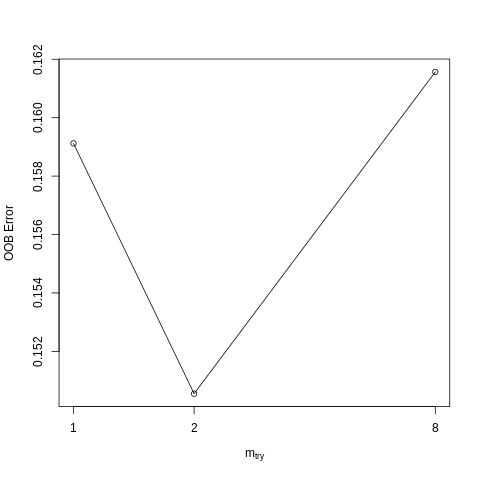

In [12]:
%%R
t <- tuneRF(train[,-9], train[,9],
            stepFactor = 6,
            plot = TRUE,
            ntreeTry = 800,
            trace = TRUE,
            improve = 0.2)